In [1]:
from docplex.mp.model import Model
import numpy as np
from source_torch.mlca.mlca_nn import MLCA_NN 

MLCA NN Class imported


In [20]:

#d_k - dimensions
# b^k - bias of layer k
# W^k - weights of matrix to compute later k+1
# o^k = max(W^k * o^k + b^k) - output of layer k
# y^k - vector of size d_k
# z^k - vector of size d_k
# q^k - vector of size d_k
# z^k = o^k


# self.M = models[list(models.keys())[0]].get_weights()[0].shape[0]  # number of items in the value model = dimension of input layer
# self.M = models[list(models.keys())[0]].model[0].weight.data.T.numpy().shape[0] # number of items in the value model = dimension of input layer
# self.Models = models  # dict of keras models
# # sorted list of bidders
# self.sorted_bidders = list(self.Models.keys())
# self.sorted_bidders.sort()
# self.N = len(models)  # number of bidders
# self.Mip = cpx.Model(name="NeuralNetworksMixedIntegerProgram")  # docplex instance
# self.z = {}  # MIP variable: see paper
# self.s = {}  # MIP variable: see paper
# self.y = {}  # MIP variable: see paper
# self.x_star = np.ones((self.N, self.M))*(-1)  # optimal allocation (-1=not yet solved)
# self.L = L  # global big-M variable: see paper
# self.soltime = None  # timing
# self.z_help = {}  # helper variable for bound tightening
# self.s_help = {}  # helper variable for bound tightening
# self.y_help = {}  # helper variable for bound tightening

# # upper bounds for MIP variables z,s. Lower bounds are 0 in our setting.
# self.upper_bounds_z = OrderedDict(list((bidder_name, [np.array([self.L]*layer_shape).reshape(-1, 1) for 
#                                         layer_shape in self._get_model_layer_shapes(bidder_name, layer_type=['dense', 'input']) ]) for bidder_name in self.sorted_bidders))
# self.upper_bounds_s = OrderedDict(list((bidder_name, [np.array([self.L]*layer_shape).reshape(-1, 1) for 
#                                         layer_shape in self._get_model_layer_shapes(bidder_name, layer_type=['dense', 'input']) ]) for bidder_name in self.sorted_bidders))

# Random values from 10 to 100
values = np.random.randint(0, 100, size=(10))
bundles = np.random.randint(0, 2, size=(10, 5))


In [58]:
print(bundles)
model = MLCA_NN(X_train = bundles, Y_train=values)
model.initialize_model(model_parameters={'learning_rate': 0.001, 'architecture': [10, 10, 10], 'dropout': False, 'dropout_prob': 0.2, 'device': 'cpu', 'regularization_type': 'l2', 'regularization': 0.01})
res = model.fit(epochs=1000, batch_size=32)

#model.train(bundles)
res

[[1 0 0 0 1]
 [0 0 0 1 0]
 [0 1 1 1 0]
 [1 1 0 0 0]
 [1 0 1 1 1]
 [0 1 0 0 0]
 [0 0 1 1 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [0 1 1 0 1]]


(None, None, 6.233358383178711, [])

In [38]:
def _get_model_weights(model): # torch
    model = model.model
    weights = []
    for params in model.parameters():
        weights.append(params.detach().cpu().numpy().T)        
    return weights

def _get_model_layer_shapes(model, layer_type=None):
    ''' return layer output shapes instead, 
        if 'input' is given as desired layer type, insert input dim at the beginning.
        assumes torch model '''
    # nnmodel = self.Models[key]
    nnmodel = model.model
    Layer_shapes = []
    for i, (name, param) in enumerate(nnmodel.named_parameters()):
        if (i==0) and ('input' in layer_type): 
            Layer_shapes.append(param.shape[1])
        if any([x in name for x in layer_type]) and ('bias' in name):
            Layer_shapes.append(param.shape[0])

    return Layer_shapes


def _clean_weights(Wb):
    for v in range(0, len(Wb)-2, 2):
        Wb[v][abs(Wb[v]) <= 1e-8] = 0
        Wb[v+1][abs(Wb[v+1]) <= 1e-8] = 0
        zero_rows = np.where(np.logical_and((Wb[v] == 0).all(axis=0), Wb[v+1] == 0))[0]
        if len(zero_rows) > 0:
            logging.debug('Clean Weights (rows) %s', zero_rows)
            Wb[v] = np.delete(Wb[v], zero_rows, axis=1)
            Wb[v+1] = np.delete(Wb[v+1], zero_rows)
            Wb[v+2] = np.delete(Wb[v+2], zero_rows, axis=0)
    return(Wb)

In [71]:
weights = _get_model_weights(model)
#transfer to numpy array
#weight = np.array(weights)
#Wb
print(_get_model_layer_shapes(model, layer_type=['dense', 'input']))
clean_weights = _clean_weights(weights)
for w in clean_weights:
    print('This is a new layer')
    print(w.shape)

[5, 10, 10, 10, 1]
This is a new layer
(5, 10)
This is a new layer
(10,)
This is a new layer
(10, 10)
This is a new layer
(10,)
This is a new layer
(10, 10)
This is a new layer
(10,)
This is a new layer
(10, 1)
This is a new layer
(1,)


In [56]:
for name, param in model.model_parameters():
    print(f'Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n')

TypeError: 'dict' object is not callable

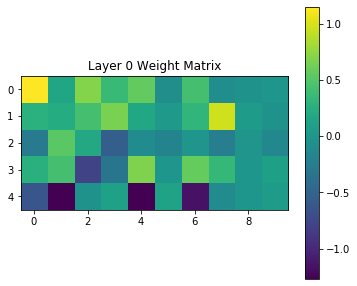

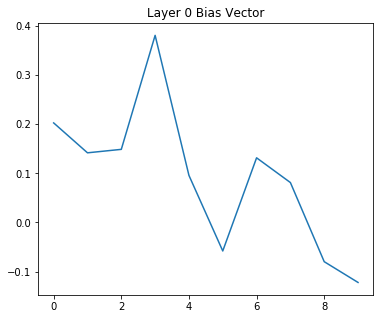

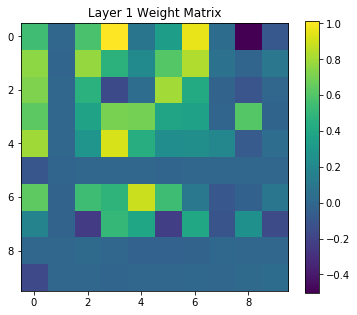

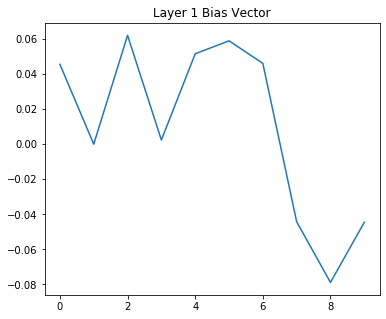

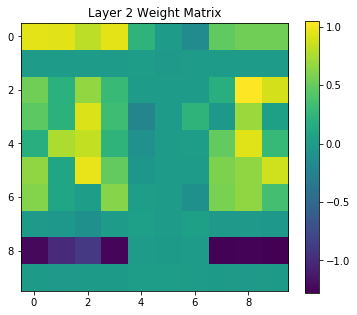

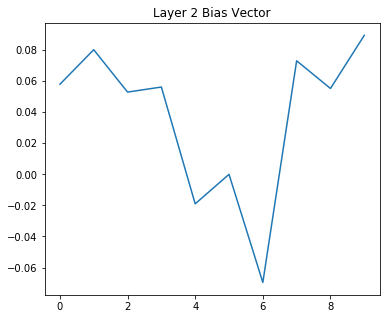

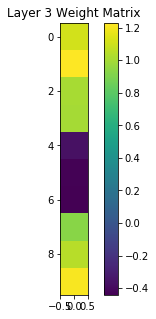

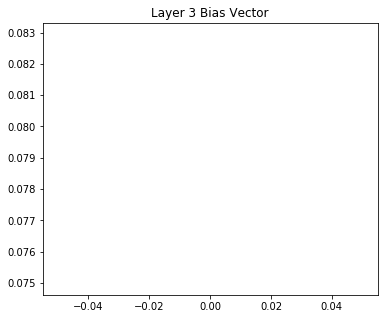

In [54]:
import matplotlib.pyplot as plt

# Assume weights is a list of numpy arrays
# Iterate over the weights
for i, weight in enumerate(weights):
    # Check if the weight is a matrix or a vector
    if len(weight.shape) == 2:
        # For matrices, we use a heatmap
        plt.figure(figsize=(6, 5))
        plt.imshow(weight, cmap='viridis')
        plt.colorbar()
        plt.title(f'Layer {i//2} Weight Matrix')
        plt.show()
    else:
        # For vectors, we use a line plot
        plt.figure(figsize=(6, 5))
        plt.plot(weight)
        plt.title(f'Layer {i//2} Bias Vector')
        plt.show()

In [ ]:
count = 0
M = 8
#big integer
C = 10000
L = 10000
while count < 10:
    for i in range(len(values)):
        m  = Model(name='galo_nn')
        #stub variables 
        z = 0
        #stub diminesions
        d = 4
        r = m.continuous_var(name='r')
        x = m.binary_var_list(range(M), name='x')
        b = m.binary_var_list(range(len(values)), name='b')
        y = m.binary_var_list(range(d), name='y')
        k = m.continuous_var_list(range(d), name='k')
        q = m.continuous_var_list(range(d), name='q')
        
        constraints = []
        constraints.append(values[i] - z[K] <= r)
        constraints.append(z[K] - values[i] <= r)
        for value in range(len(values)):
            constraints.append(values[value] - z[K] + C * b[value] <= r)
            constraints.append(z[K] - values[value] + C * (1- b[value]) <= r)
        
        constraints.append(z_0 = x)
        for k in range(d):
            constraints.append(z[k] - q[k] = W[k-1] *z[k-1] + b[k-1])
            constraints.append(0 <= z[k] <= y[k] * L)
            constraints.append(0 <= q[k] <= (1-y[k]) * L)
        

    